# Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
titanic_df = sns.load_dataset('titanic')
titanic_df.shape

(891, 15)

In [3]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Let's spilt the data between trainning (train_df) and testing dataset (test_df) first

In [4]:
train_df = titanic_df.sample(int(titanic_df.shape[0] * 0.8))
print(train_df.shape)
train_df.head()

(712, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
853,1,1,female,16.0,0,1,39.4000,S,First,woman,False,D,Southampton,yes,False
663,0,3,male,36.0,0,0,7.4958,S,Third,man,True,NaN,Southampton,no,True
21,1,2,male,34.0,0,0,13.0000,S,Second,man,True,D,Southampton,yes,True
383,1,1,female,35.0,1,0,52.0000,S,First,woman,False,NaN,Southampton,yes,False
525,0,3,male,40.5,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True


Remember the row that are in the full df, but not in the training set

In [5]:
testing_rows = [idx for idx in titanic_df.index if idx not in train_df.index]
len(testing_rows)

179

In [6]:
test_df = titanic_df.iloc[testing_rows, :]
print(test_df.shape)
test_df.head()

(179, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
12,0,3,male,20.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
23,1,1,male,28.0,0,0,35.5000,S,First,man,True,A,Southampton,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True


# Exploratory Data Analysis

# A new way for checking Missing Data

## Using heatmap

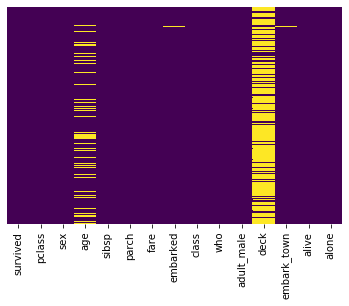

In [7]:
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

So Age is missing about 20% which can be fixed by imputation. But deck seems too much

In [8]:
train_df.deck.unique()

[D, NaN, E, C, B, F, A, G]
Categories (7, object): [D, E, C, B, F, A, G]

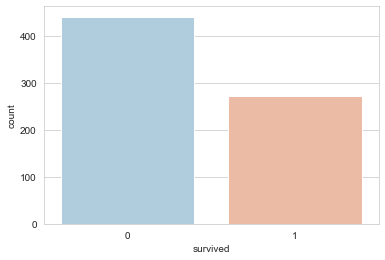

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='survived',data= train_df, palette='RdBu_r')

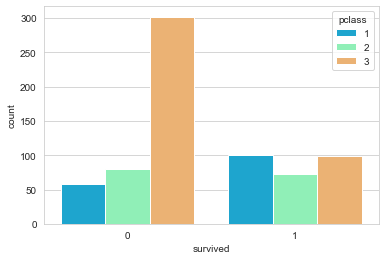

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='pclass',data=train_df,palette='rainbow')

Now we want to fill in the missing value for Age. However, instead of just using the mean for all passengers, we fill it by the mean by pclass because wealthier passengers tend to be older

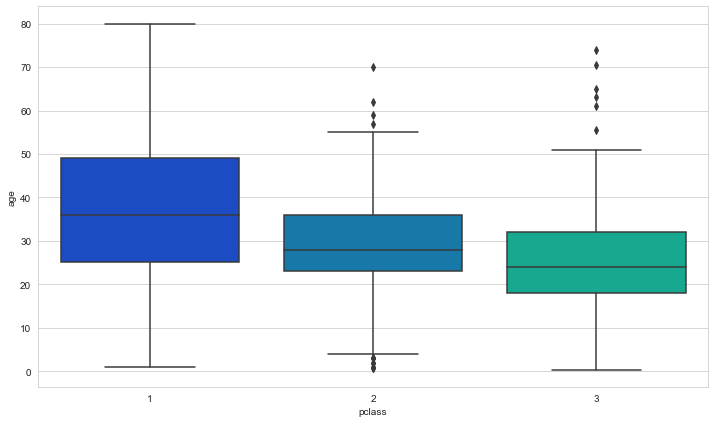

In [11]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='pclass',y='age',data=train_df,palette='winter')

In [12]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

Now apply this function

In [13]:
train_df['age'] = train_df[['age','pclass']].apply(impute_age,axis=1)

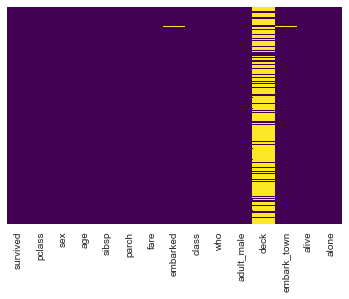

In [14]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Now deck has too much missin value and so we just drop that column. Also we will simply drop the row that has missing embarked

In [15]:
train_df.drop('deck',axis=1,inplace=True)

In [16]:
train_df.dropna(inplace=True)

In [17]:
train_df.shape

(711, 14)

In [18]:
train_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
853,1,1,female,16.0,0,1,39.4000,S,First,woman,False,Southampton,yes,False
663,0,3,male,36.0,0,0,7.4958,S,Third,man,True,Southampton,no,True
21,1,2,male,34.0,0,0,13.0000,S,Second,man,True,Southampton,yes,True
383,1,1,female,35.0,1,0,52.0000,S,First,woman,False,Southampton,yes,False
525,0,3,male,40.5,0,0,7.7500,Q,Third,man,True,Queenstown,no,True


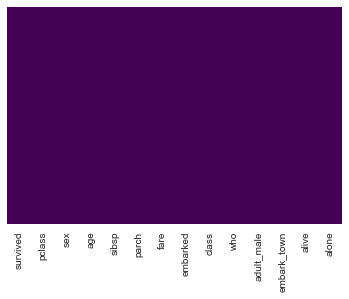

In [19]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
# Now let's use just the numerical variables (will come back to revisit)

In [21]:
train = train_df[['survived','pclass', 'age', 'sibsp', 'parch', 'fare']]
train.head()

,survived,pclass,age,sibsp,parch,fare
853,1,1,16.0,0,1,39.4000
663,0,3,36.0,0,0,7.4958
21,1,2,34.0,0,0,13.0000
383,1,1,35.0,1,0,52.0000
525,0,3,40.5,0,0,7.7500


# Building a Logistic Regression model

In [22]:
from sklearn.model_selection import train_test_split


In [23]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('survived',axis=1), 
                                                    train['survived'], test_size=0.20, 
                                                    random_state=101)

## Model Training

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
predictions = model.predict(X_test)

# Evaluation

In [26]:
from sklearn.metrics import classification_report, accuracy_score

In [27]:
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.65      0.87      0.74        85
           1       0.62      0.31      0.41        58

    accuracy                           0.64       143
   macro avg       0.63      0.59      0.58       143
weighted avg       0.64      0.64      0.61       143

0.6433566433566433


## 70% on average, not bad!!

# NOW, let's talk about how to include the categorical variables (such as Sex, and Embarked etc)

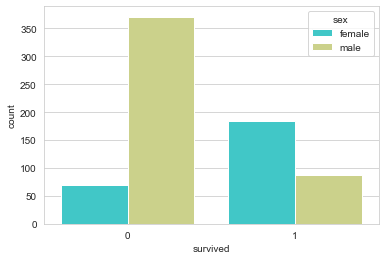

In [28]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='sex',data=train_df,palette='rainbow')

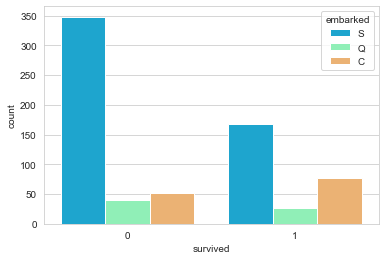

In [29]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='embarked',data=train_df,palette='rainbow')

## Clearly Sex and Embarked makes a difference

# Converting Categorical Features

In [30]:
sex = pd.get_dummies(train_df['sex'],drop_first=True)
embark = pd.get_dummies(train_df['embarked'],drop_first=True)

In [31]:
sex

,male
853,0
663,1
21,1
383,0
525,1
...,...
103,1
469,0
474,0
158,1


In [32]:
embark

,Q,S
853,0,1
663,0,1
21,0,1
383,0,1
525,1,0
...,...,...
103,0,1
469,0,0
474,0,1
158,0,1


In [33]:
train.head()

,survived,pclass,age,sibsp,parch,fare
853,1,1,16.0,0,1,39.4000
663,0,3,36.0,0,0,7.4958
21,1,2,34.0,0,0,13.0000
383,1,1,35.0,1,0,52.0000
525,0,3,40.5,0,0,7.7500


In [34]:
train = pd.concat([train, sex, embark], axis=1)
train.head()

,survived,pclass,age,sibsp,parch,fare,male,Q,S
853,1,1,16.0,0,1,39.4000,0,0,1
663,0,3,36.0,0,0,7.4958,1,0,1
21,1,2,34.0,0,0,13.0000,1,0,1
383,1,1,35.0,1,0,52.0000,0,0,1
525,0,3,40.5,0,0,7.7500,1,1,0


## So we have 3 more features (male, Q, S)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('survived',axis=1), 
                                                    train['survived'], test_size=0.30, 
                                                    random_state=101)
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       127
           1       0.80      0.70      0.75        87

    accuracy                           0.81       214
   macro avg       0.81      0.79      0.80       214
weighted avg       0.81      0.81      0.81       214

0.8084112149532711


## Wonderful, we have increased our F1-score from 70% to 81%

# Great Job